# EEG Brain Wave Band Analysis: ADHD vs Control
This notebook groups EEG channels into brain wave bands:
- Delta: T7, T8, P7, P8
- Theta: Fz, Cz, Pz
- Alpha: O1, O2, P3, P4
- Beta: F3, F4, C3, C4
- Gamma: F7, F8, Fp1, Fp2

Each band is visualized over time for one ADHD and one Control patient.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load EEG data
df = pd.read_csv('../data/adhdata.csv')

# Define brain wave bands
bands = {
    'Delta': ['T7', 'T8', 'P7', 'P8'],
    'Theta': ['Fz', 'Cz', 'Pz'],
    'Alpha': ['O1', 'O2', 'P3', 'P4'],
    'Beta': ['F3', 'F4', 'C3', 'C4'],
    'Gamma': ['F7', 'F8', 'Fp1', 'Fp2']
}

## Time-Series of Brain Wave Bands (One ADHD and One Control Patient)

In [2]:
# Select one patient per class
adhd_id = df[df['Class'] == 'ADHD']['ID'].iloc[0]
control_id = df[df['Class'] == 'Control']['ID'].iloc[0]

adhd_df = df[df['ID'] == adhd_id].reset_index(drop=True)
control_df = df[df['ID'] == control_id].reset_index(drop=True)

# Calculate average band values per time step
adhd_band_values = adhd_df.copy()
control_band_values = control_df.copy()

for band, chs in bands.items():
    adhd_band_values[band] = adhd_df[chs].mean(axis=1)
    control_band_values[band] = control_df[chs].mean(axis=1)

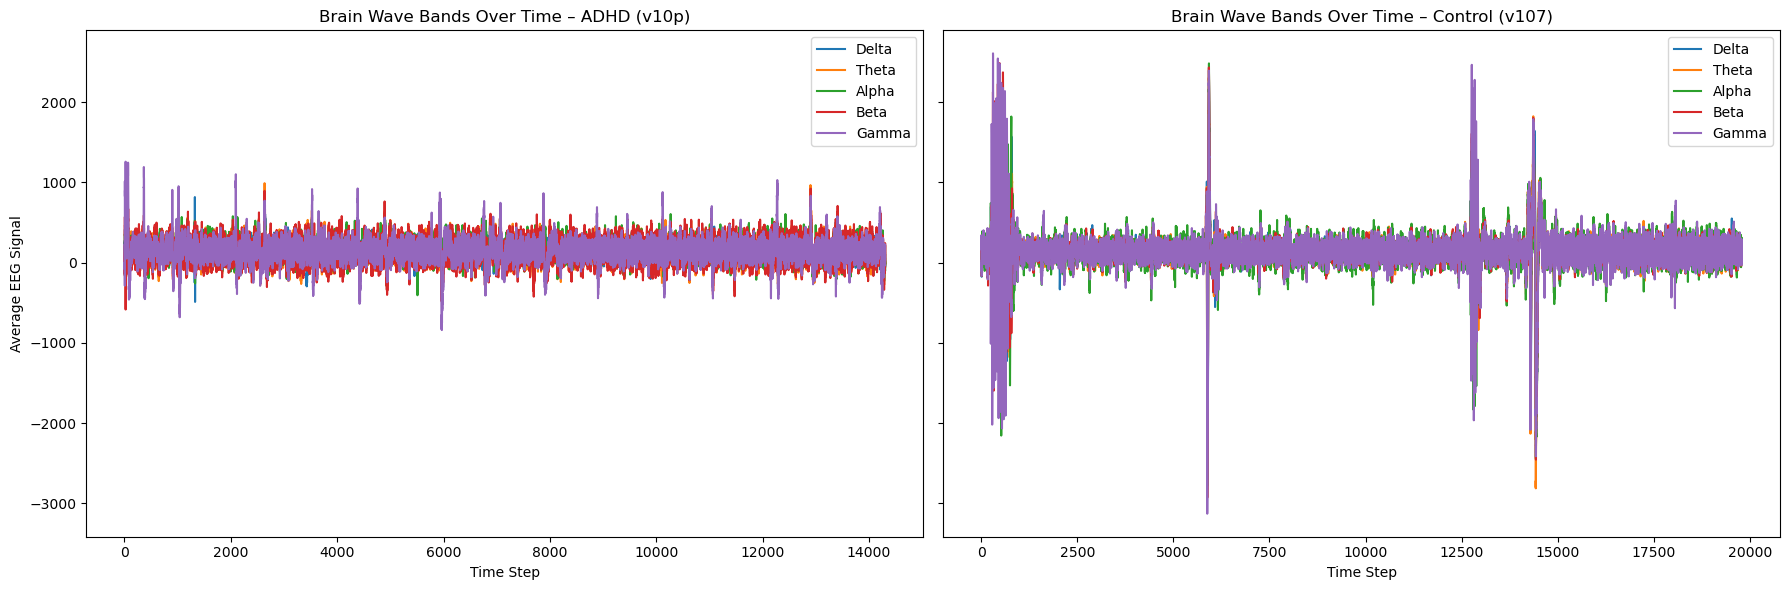

In [3]:
# Plot band values over time
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

for band in bands:
    axs[0].plot(adhd_band_values.index, adhd_band_values[band], label=band)
    axs[1].plot(control_band_values.index, control_band_values[band], label=band)

axs[0].set_title(f"Brain Wave Bands Over Time – ADHD ({adhd_id})")
axs[1].set_title(f"Brain Wave Bands Over Time – Control ({control_id})")
axs[0].set_xlabel("Time Step")
axs[1].set_xlabel("Time Step")
axs[0].set_ylabel("Average EEG Signal")
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()

## Comparison Plots for Each Brain Wave Band (ADHD vs Control)

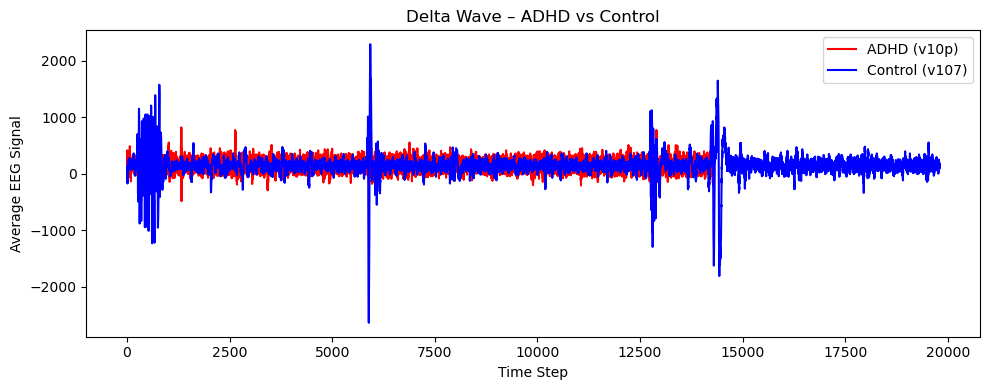

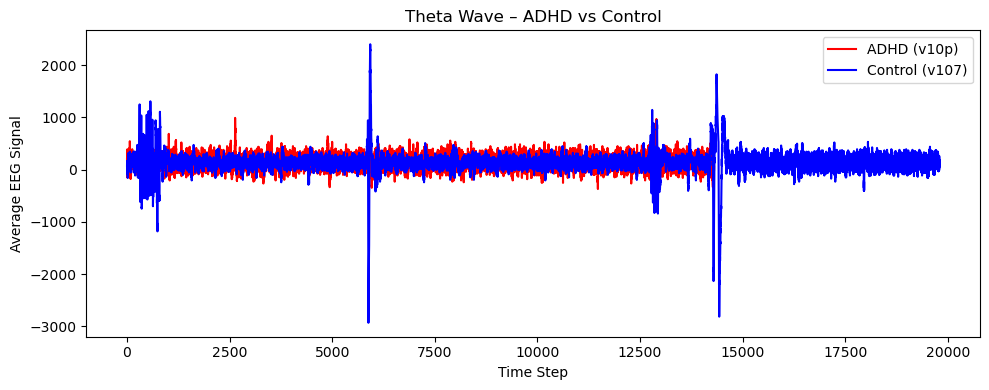

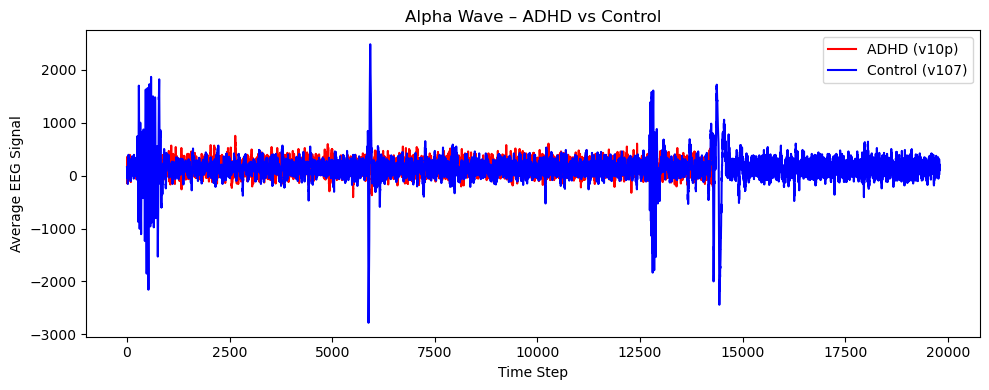

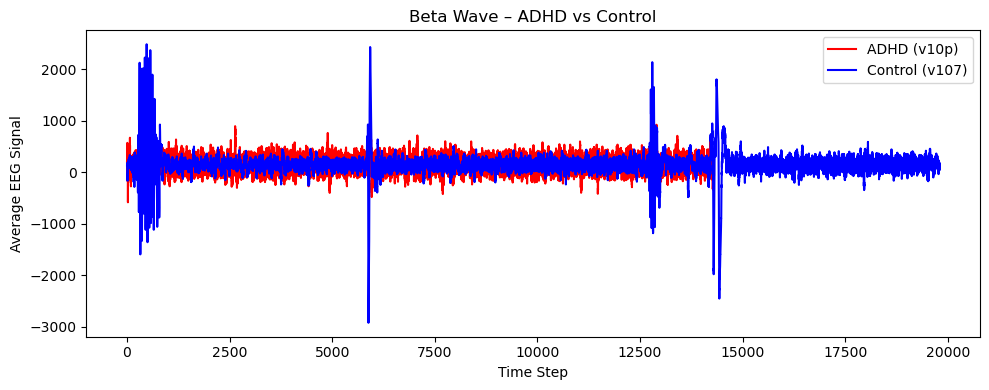

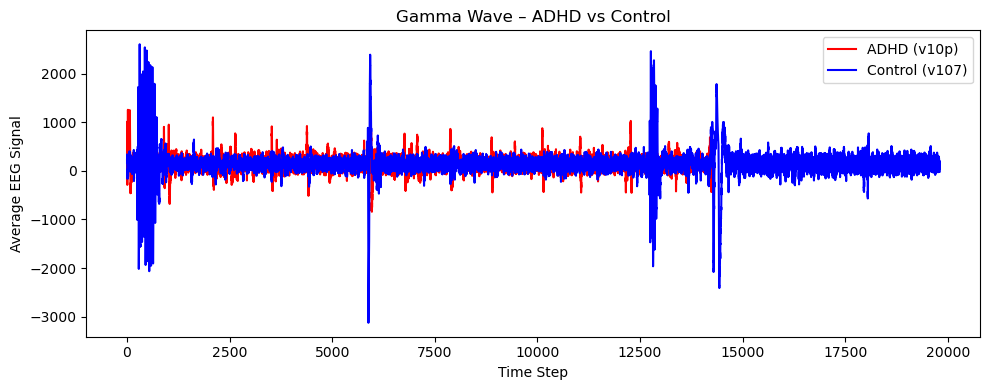

In [4]:
# Separate plots per wave band comparing ADHD and Control
for band in bands:
    plt.figure(figsize=(10, 4))
    plt.plot(adhd_band_values.index, adhd_band_values[band], label=f'ADHD ({adhd_id})', color='red')
    plt.plot(control_band_values.index, control_band_values[band], label=f'Control ({control_id})', color='blue')
    plt.title(f"{band} Wave – ADHD vs Control")
    plt.xlabel("Time Step")
    plt.ylabel("Average EEG Signal")
    plt.legend()
    plt.tight_layout()
    plt.show()